In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#aplicando lasso
#lendo base
dados = pd.read_csv('C:/csv/Regressao/Regresao_Lasso_Ridge.csv')

In [4]:
#lendo dados
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
#nomes não são necessarios
dados = dados.drop('name',axis=1)

In [6]:
#lendo dados
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
#tentando achar tipos não numericos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.9+ KB


In [8]:
#transformando em dados numericos
dados['horsepower'] = pd.to_numeric(dados['horsepower'], errors='coerce')

In [9]:
#checando dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB


In [10]:
#checando quantidade de valores nulos em cada coluna
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [11]:
#removendo dados nulos
dados = dados.dropna()

In [12]:
#checando dados novamente
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [13]:
#checando maior valor de cada coluna
dados.max()

mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
origin             3.0
dtype: float64

In [14]:
#checando menor valor de cada coluna
dados.min()

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
year              70.0
origin             1.0
dtype: float64

In [15]:
X = dados.drop('mpg',axis=1).values
Y = dados['mpg'].values

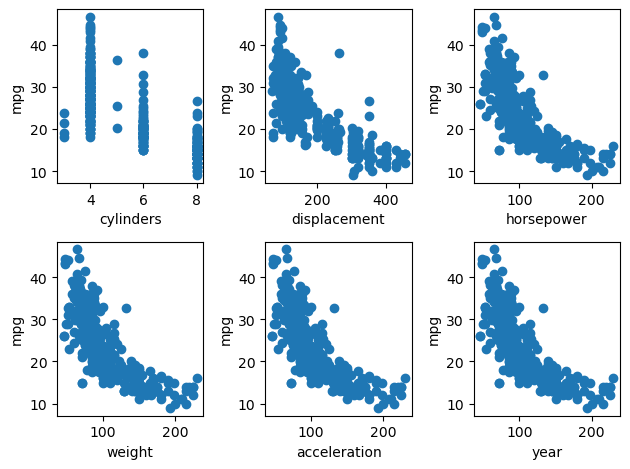

In [16]:
#sistema de plotagem de graficos (dá pra fazer com seaborn)

fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,2],Y);
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,2],Y);
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,2],Y);
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,2],Y);
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();

#checando regressões, é notado que há regressão não linear

In [17]:
#Aplicando regressão de Lasso
from sklearn.linear_model import Lasso

In [18]:
#Aplicando inicialmente com coeficiente alpha=0.5
#coeficiente de suavização
modelo1 = Lasso(alpha=0.5)
modelo1.fit(X, Y)
#checar score nesse contexto      

Lasso(alpha=0.5)

In [19]:
score = modelo1.score(X, Y)

In [20]:
score
#0.80 proximo a 1

0.8081267287896752

In [21]:
#Tentando achar o melhor valor para o score
#Determinando o score com diferentes lambdas
lambdas = [0.0001,0.001, 0.01, 0.1, 0.5, 1]

In [22]:
#criando lista vazia
scores = []

In [23]:
#preenchendo a lista com os scores do lambda
for i in range(len(lambdas)):
    modelo = Lasso(alpha=lambdas[i])
    modelo.fit(X, Y)
    score = modelo.score(X, Y)
    scores.append(score) 

In [24]:
#melhor score é o segundo
print(scores)

[0.8214780752331419, 0.8214779504690249, 0.8214655764445802, 0.8202315165369874, 0.8081267287896752, 0.8069474979241383]


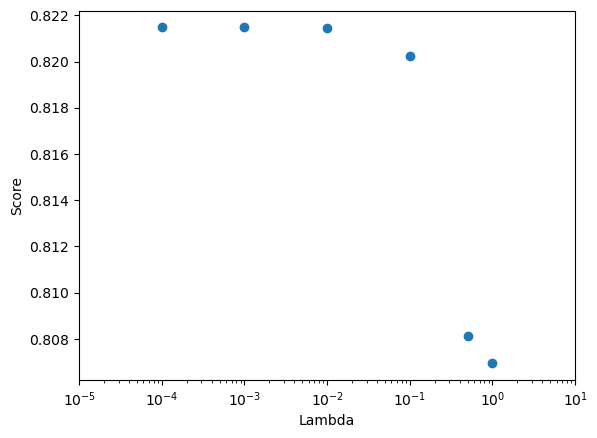

In [25]:
plt.scatter(lambdas,scores);
plt.xlabel('Lambda');
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10]);

In [26]:
#melhor resultado de score foi 0.001
modelo_final = Lasso(alpha=0.001)
modelo_final.fit(X, Y)
     

Lasso(alpha=0.001)

In [27]:
Y_pred = modelo_final.predict(X)

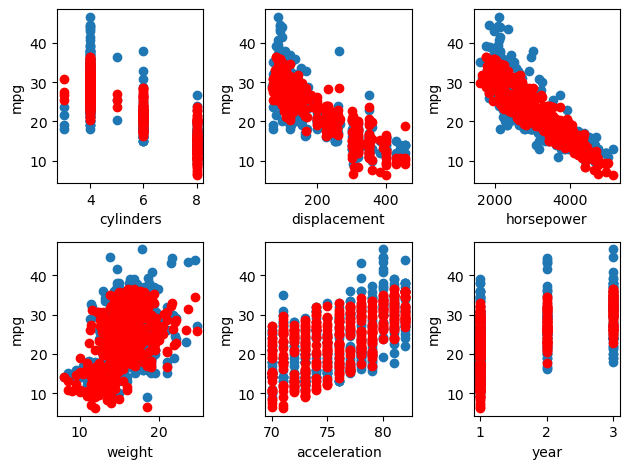

In [28]:
fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].scatter(X[:,0],Y_pred,color='red');
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].scatter(X[:,1],Y_pred,color='red');
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,3],Y);
ax[0,2].scatter(X[:,3],Y_pred,color='red');
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,4],Y);
ax[1,0].scatter(X[:,4],Y_pred,color='red');
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,5],Y);
ax[1,1].scatter(X[:,5],Y_pred,color='red');
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,6],Y);
ax[1,2].scatter(X[:,6],Y_pred,color='red');
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');


#dados em vermelhos são dados mais suavizados que demonstram a realizade
#Azuis são mais exparsos e possuem mais dados descrepantes
plt.tight_layout();

In [29]:
#aplicando Ridge

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dados = pd.read_csv('C:/csv/Regressao/Regresao_Lasso_Ridge.csv')
    

In [31]:
#lendo base
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [32]:
#Coluna name possue apenas os nomes dos carros e por este motivo pode ser removida
dados = dados.drop('name',axis=1)

In [33]:
#checando se há valore não numericos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.9+ KB


In [34]:
#Coluna horsepower está como tipo objeto e precisa ser convertida para outra classe
dados['horsepower'] = pd.to_numeric(dados['horsepower'], errors='coerce')
     

In [35]:
#checando se há valores não numericos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB


In [36]:
#checando se há valores nulos
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [40]:
#removendo dados nulos
dados = dados.dropna()

In [41]:
from sklearn.linear_model import Ridge

In [42]:
#aplicando alpha de 0.5 no ridge para suavização
modelo1 = Ridge(alpha=0.5)
modelo1.fit(X, Y)

Ridge(alpha=0.5)

In [43]:
score = modelo1.score(X, Y)

In [44]:
#checando score com base de 0,5
score

0.8214778919054473

In [45]:
#criando valores de alpha(coefience) para ridge e então rolar teste
lambdas = [0.00001,0.0001,0.001, 0.01, 0.1, 0.5, 1, 2, 5]
     

In [46]:
#lista vazia
scores = []

In [48]:
#preenchendo lista com os coeficientes
for i in range(len(lambdas)):
    modelo = Ridge(alpha=lambdas[i])
    modelo.fit(X, Y)
    score = modelo.score(X, Y)
    scores.append(score)
    
scores
    

[0.8214780764810596,
 0.8214780764810523,
 0.8214780764803157,
 0.821478076406655,
 0.8214780690511909,
 0.8214778919054473,
 0.8214773439696236,
 0.8214751919212024,
 0.8214608607733553,
 0.8214780764810596,
 0.8214780764810523,
 0.8214780764803157,
 0.821478076406655,
 0.8214780690511909,
 0.8214778919054473,
 0.8214773439696236,
 0.8214751919212024,
 0.8214608607733553]

In [49]:
#usando melhor valor de alpha encontrado 0.001
modelo_final = Ridge(alpha=0.001)
modelo_final.fit(X, Y)

Ridge(alpha=0.001)

In [50]:
Y_pred = modelo_final.predict(X)

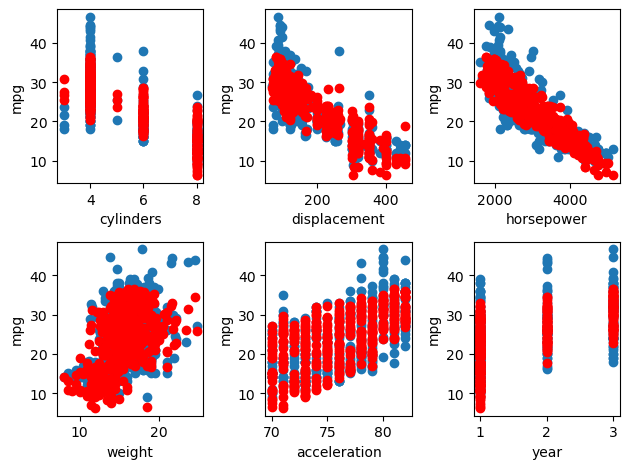

In [51]:
#plotando configurações, cores vermelhas são dados suavizados
fig, ax = plt.subplots(2, 3)
ax[0,0].scatter(X[:,0],Y);
ax[0,0].scatter(X[:,0],Y_pred,color='red');
ax[0,0].set_xlabel('cylinders');
ax[0,0].set_ylabel('mpg');

ax[0,1].scatter(X[:,1],Y);
ax[0,1].scatter(X[:,1],Y_pred,color='red');
ax[0,1].set_xlabel('displacement');
ax[0,1].set_ylabel('mpg');

ax[0,2].scatter(X[:,3],Y);
ax[0,2].scatter(X[:,3],Y_pred,color='red');
ax[0,2].set_xlabel('horsepower');
ax[0,2].set_ylabel('mpg');

ax[1,0].scatter(X[:,4],Y);
ax[1,0].scatter(X[:,4],Y_pred,color='red');
ax[1,0].set_xlabel('weight');
ax[1,0].set_ylabel('mpg');

ax[1,1].scatter(X[:,5],Y);
ax[1,1].scatter(X[:,5],Y_pred,color='red');
ax[1,1].set_xlabel('acceleration');
ax[1,1].set_ylabel('mpg');

ax[1,2].scatter(X[:,6],Y);
ax[1,2].scatter(X[:,6],Y_pred,color='red');
ax[1,2].set_xlabel('year');
ax[1,2].set_ylabel('mpg');

plt.tight_layout();